# Alodataset: Loading your vision datasets

Alodataset implement ready-to-use datasets for computer vision with the help of aloscene and augmented tensors to make it easy to transform and display your vision data. The list of all datasets can be found into the  alodataset section in the aloception API.

## Using samples

Most proposed dataset on aloception can be built using `samples=True`. It means you can at any point try out one dataset without having the data on your disk. This is great for quick test or to quickly try out a model.

Here is a quick example of creating datasets using samples.

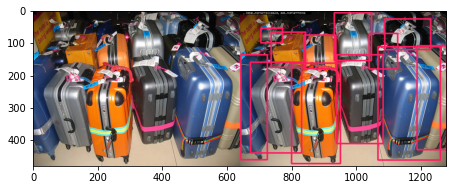

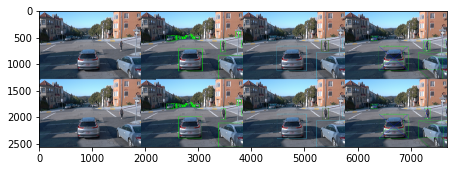

In [29]:
import alodataset

# Coco Detection Dataset
dataset = alodataset.CocoDetectionDataset(sample=True)
frame = dataset.getitem(0)
frame.get_view().render()

dataset = alodataset.WaymoDataset(sample=True)
# This dataset return multiple camera view
waymo_frame = dataset.getitem(0)["front"]
waymo_frame.get_view().render()


<div class="alert alert-info">
**NOTE**
    
- In the above example, getting a view on the Waymo dataset display more images since the frames are made of multiple set of boxes 2d. By default, get view will plot all the sets on different view. 
    
- Using the samples, the frames are made using a temporal dimension. Therefore, the plot display the first (t=0) and second time step (t=1).
</div>


In [30]:
print(waymo_frame.shape, waymo_frame.names)

torch.Size([2, 3, 1280, 1920]) ('T', 'C', 'H', 'W')


## Stream loader

The provided dataset on aloception all exposed a `stream_loader()` method. It make particular sense for datasets with sequences. The method will iterate on the data without shuffling and without batch. 
Here is an example



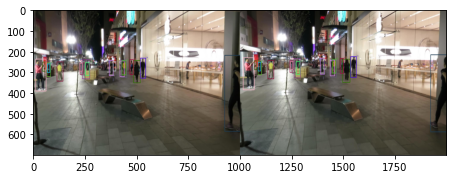

In [35]:
import alodataset

mot_dataset = alodataset.Mot17(sample=True, validation_sequences=["MOT17-05"])

for frames in mot_dataset.stream_loader():
    frames.names
    frames.get_view(
        [
            frames.boxes2d[0].get_view(frames[0], labels_set="objects_id"),
            frames.boxes2d[1].get_view(frames[1], labels_set="objects_id"),
        ],
        size=(700, 1000),
    ).render()
    break

## Train loader

The train loader is the one used for training or validation. The train_loader will return frames as batch (list of Frame) and can be optinally changed to 